시각화에 사용할 모든 데이터는 ./data 폴더 내부에 위치시켜주세요

In [1]:
import os
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.python.summary.summary_iterator import summary_iterator
from IPython.display import display


In [2]:
ROOT = 'data/'
import data_manage as dm
import visualization as vis 
import lrlo

In [3]:
train_log_dir = ROOT + "logs/" + "240318-184226_videopath_JK_rewardmethod_10_importantmethod_021_threshold_0.35"
test_log_dir = ROOT + "logs/" + "JK-1_TEST_LOWEPS_Agent2_MASK_same_003"
model_path = ROOT + "models/" + "240318-225851_videopath_JK_rewardmethod_11_importantmethod_021_threshold_0.3_epsdec_0.005.npy"

In [4]:
train_df = dm.load_log(train_log_dir)
dm.df_info(train_df)

test_df = dm.load_log(test_log_dir, tag_filter=["Network/Diff", "Network/send_a(t)", "Network/target_A(t)"])
dm.df_info(test_df)

Instructions for updating:
Use eager execution and: 
`tf.data.TFRecordDataset(path)`
DataFrame Info:
✲ Shape: (150, 3)
✲ Columns:
Index(['Reward/all', 'Reward/10', 'Network/send_a(t)'], dtype='object')

✲ Data Types:
Reward/all           float64
Reward/10            float64
Network/send_a(t)    float64
dtype: object

✲Non-null Value Counts:
Reward/all           150
Reward/10            150
Network/send_a(t)    150
dtype: int64

DataFrame HEAD:
--------------------------------------------------


,Reward/all,Reward/10,Network/send_a(t)
0,215.047760,215.047760,6498.0
1,199.392685,199.392685,6208.0
2,204.533752,204.533752,6220.0
3,202.872406,202.872406,6304.0
4,197.942703,197.942703,6133.0


DataFrame TAIL:
--------------------------------------------------


,Reward/all,Reward/10,Network/send_a(t)
145,237.753036,237.753036,4663.0
146,247.307404,247.307404,6172.0
147,234.705673,234.705673,5429.0
148,240.958954,240.958954,5342.0
149,240.226990,240.226990,5082.0


DataFrame Info:
✲ Shape: (192, 3)
✲ Columns:
Index(['Network/Diff', 'Network/target_A(t)', 'Network/send_a(t)'], dtype='object')

✲ Data Types:
Network/Diff           float64
Network/target_A(t)    float64
Network/send_a(t)      float64
dtype: object

✲Non-null Value Counts:
Network/Diff           192
Network/target_A(t)    192
Network/send_a(t)      192
dtype: int64

DataFrame HEAD:
--------------------------------------------------


,Network/Diff,Network/target_A(t),Network/send_a(t)
0,4.0,30.0,26.0
1,26.0,30.0,4.0
2,11.0,30.0,19.0
3,13.0,30.0,17.0
4,20.0,30.0,10.0


DataFrame TAIL:
--------------------------------------------------


,Network/Diff,Network/target_A(t),Network/send_a(t)
187,0.0,2.0,2.0
188,0.0,2.0,2.0
189,0.0,2.0,2.0
190,0.0,2.0,2.0
191,11.0,30.0,19.0


In [5]:
save_path = lrlo.make_save_path(test_log_dir, "barcode")

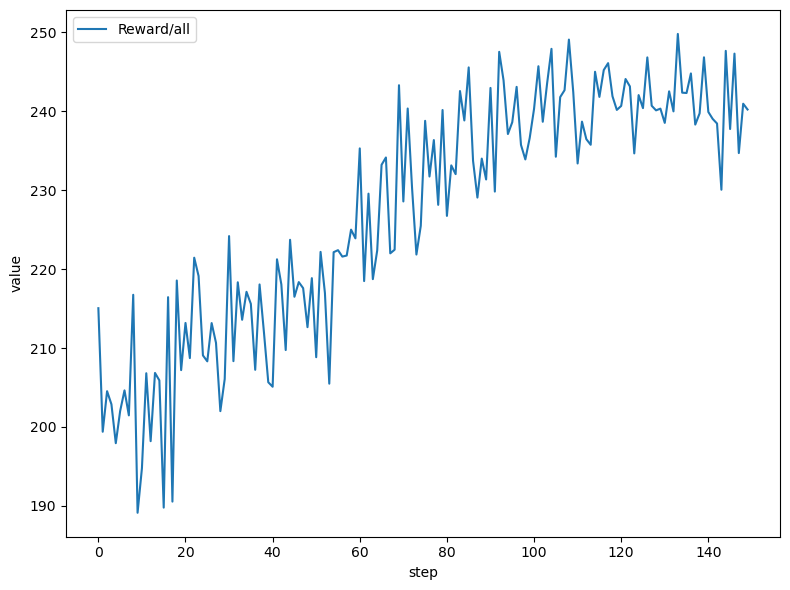

In [6]:
df_2 = dm.extract_column_from_df(train_df, ["Reward/all"])
vis.plot_dataframe(df_2, save=False)


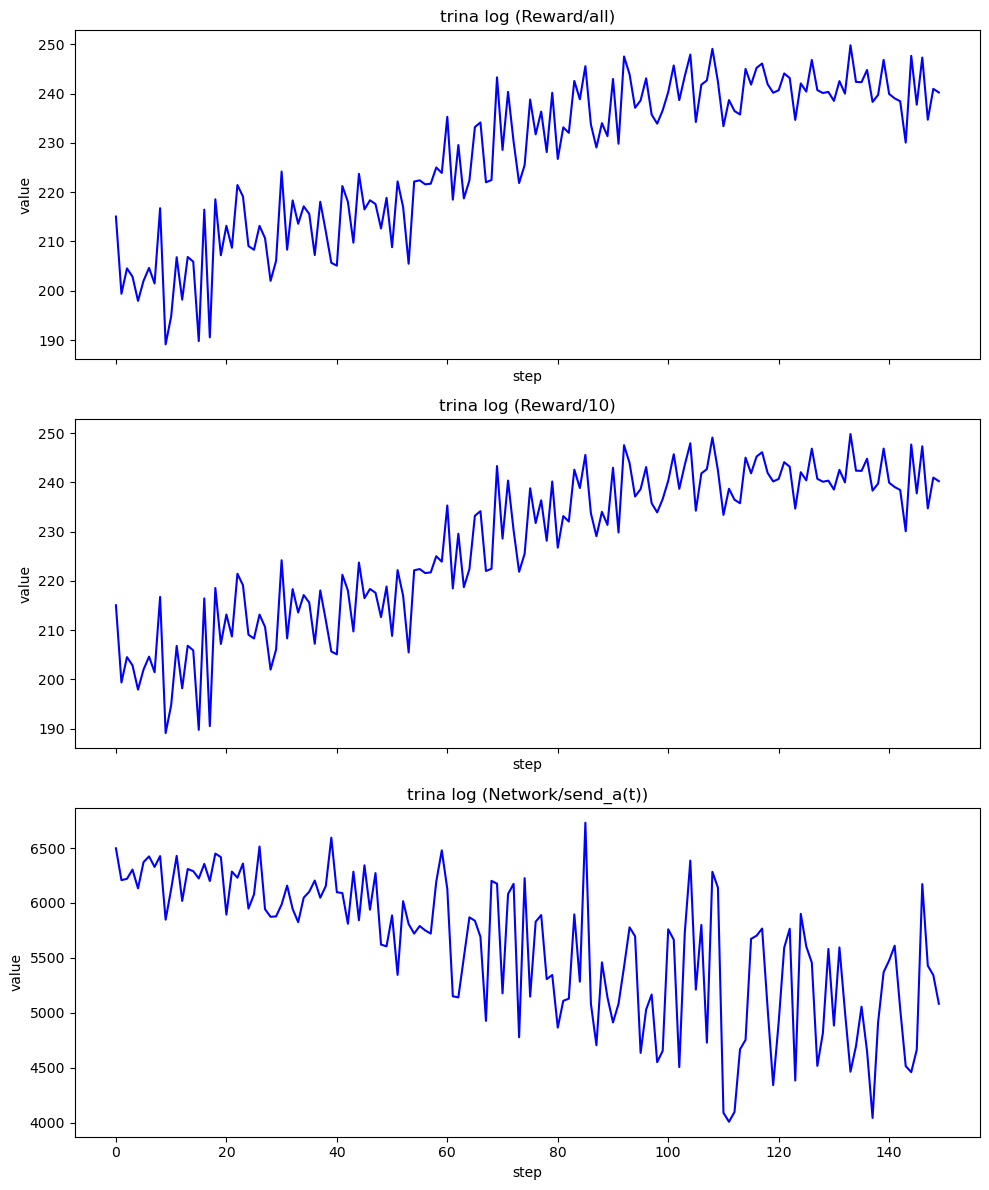

In [10]:
vis.plot_dataframe_each_plot(train_df, title="train log", save=False)

In [8]:
test_send_df = dm.extract_column_from_df(test_df, ["Network/send_a(t)"])
test_action_df = dm.revise_df(test_send_df, 'subtract', column="Network/send_a(t)", value=30, prior_value=True)
# vis.make_barcode(test_send_df, 192*30, "red")
# vis.make_barcode(test_action_df, 192*30, "blue")

In [9]:
column_list = ["Network/send_a(t)"]
df_name_list = ["entire", "extract"]
df_list = [test_df, test_send_df]
new_df = dm.combine_columns_into_df(column_list, df_name_list, df_list)